Nama : Alya Nur Oktapiani <br>
NIM : 211351015 <br>
Kelas : Pagi B <br>

#Import Datasets

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"alyanuroktapiani","key":"688a8111784d7520a15eab13952592d4"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d uciml/german-credit

german-credit.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip german-credit.zip -d datas
!ls datas

Archive:  german-credit.zip
replace datas/german_credit_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: datas/german_credit_data.csv  
german_credit_data.csv


#Import library yang digunakan

In [5]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#Data Discovery

In [6]:
df = pd.read_csv('datas/german_credit_data.csv')

In [7]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


Duration disini adalah durasi dalam jangka per bulan.

In [8]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

ada missing data, tpi sebelum itu kita akan meneruskan proses data discovering kita.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


Terdapat 5 kolom yang memiliki Dtype integer dan 4 object, kita akan menentukan kolom apa saja yang akan kita gunakan pada bagian EDA setelah menganalisis grafik dan melakukan pengambilan datanya pada tahap preprocessing.

In [10]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


Terdapat 1000 baris data per sebelum ianya diproses alias pembersihan data, karena sebelumnya kita menemukan terdapat data null pada beberapa baris data. ohiya, describe ini hanya menunjukkan kolom yang bertype data integer karena datatype itulah yang bisa dicari nilai mean, std, min, dan lain lainnya.

#EDA

Okeh, mari lanjut dengan meng-visualisasikan data data yang nantinya akan melewati tahap preprocessing.

Pertama mari kita visualisasikan sebuah scatter plot yang menunjukkan durasi dan credit amount berdasarkan gender.

<Axes: xlabel='Credit amount', ylabel='Duration'>

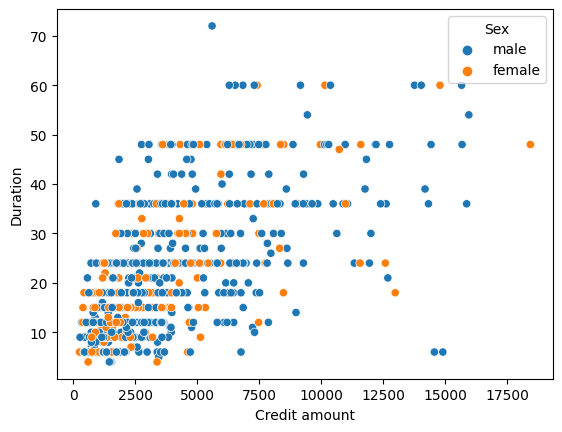

In [11]:
sns.scatterplot(x="Credit amount",y="Duration", hue="Sex", data = df)

Disini kita bisa lihat bahwa tidak ada seorangpun pria yang memiliki credit diatas 17500DM meskipun sudah memiliki credit cardnya selama 40 bulan.

<Axes: xlabel='Age', ylabel='Credit amount'>

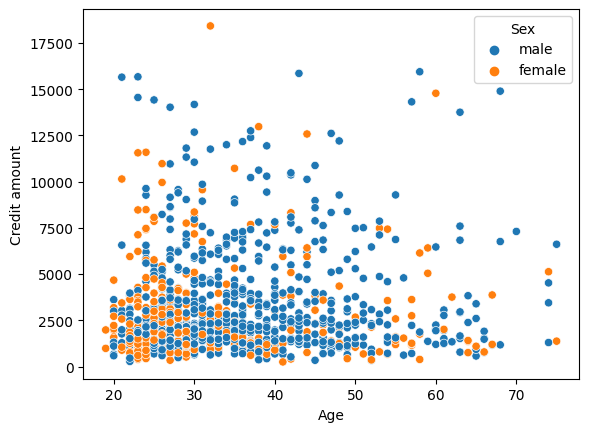

In [12]:
sns.scatterplot(x="Age",y="Credit amount", hue="Sex", data = df)

Dari scatterplot diatas bisa disimpulkan bahwa sangat sedikit sekali seorang lansia berumur diatas 70 tahun memiliki credit amount diatas 5000DM.

Selanjutnya mari lihat data data ini menggunakan garis linear untuk melihat perbedaan antar 2 kolom.

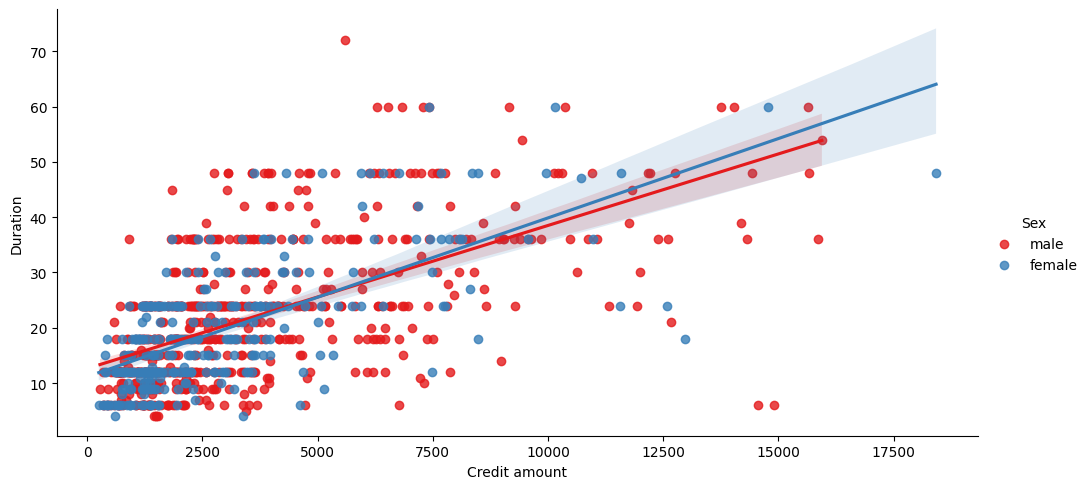

In [13]:
sns.lmplot(x="Credit amount",y="Duration", hue="Sex", data=df, palette="Set1", aspect=2)
plt.show()

Perlu dicatat bahwa jarak antara kedua garis tersebut tidak terlalu jauh yang artinya perbedaannya tidak terlalu significant.

Next, kita akan melihatnya by housing(apakah pelanggan memiliki rumah atau tidak).

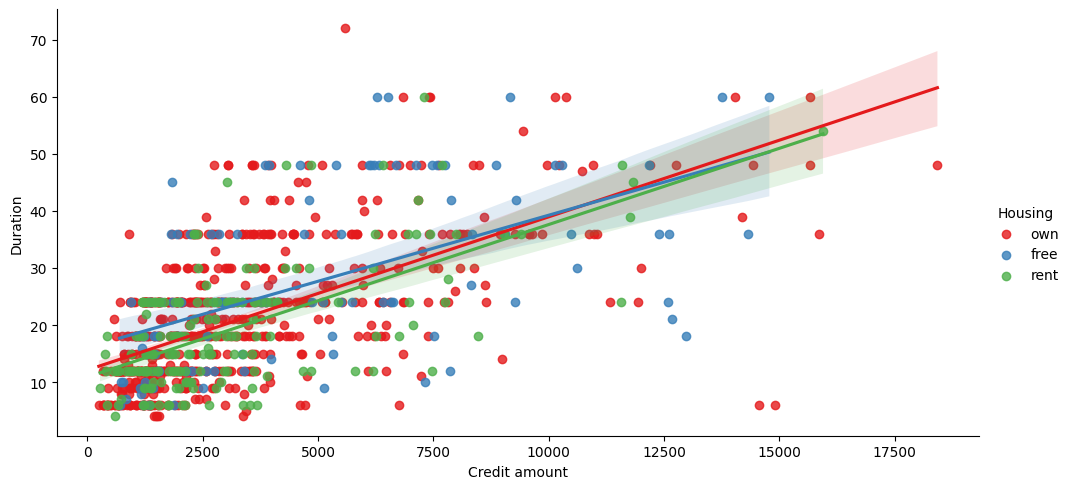

In [14]:
sns.lmplot(x="Credit amount",y="Duration", hue="Housing", data=df, palette="Set1", aspect=2)
plt.show()

Sama seperti gender, tampaknya perbedaannya tidak terlalu signifikan, bisa dilihat dari jarak antar ketiga garis diatas.

Kita akan melihat secara keseluruhan alasan orang-orang menggunakan creditnya dan mendapatkan credit tersebut.

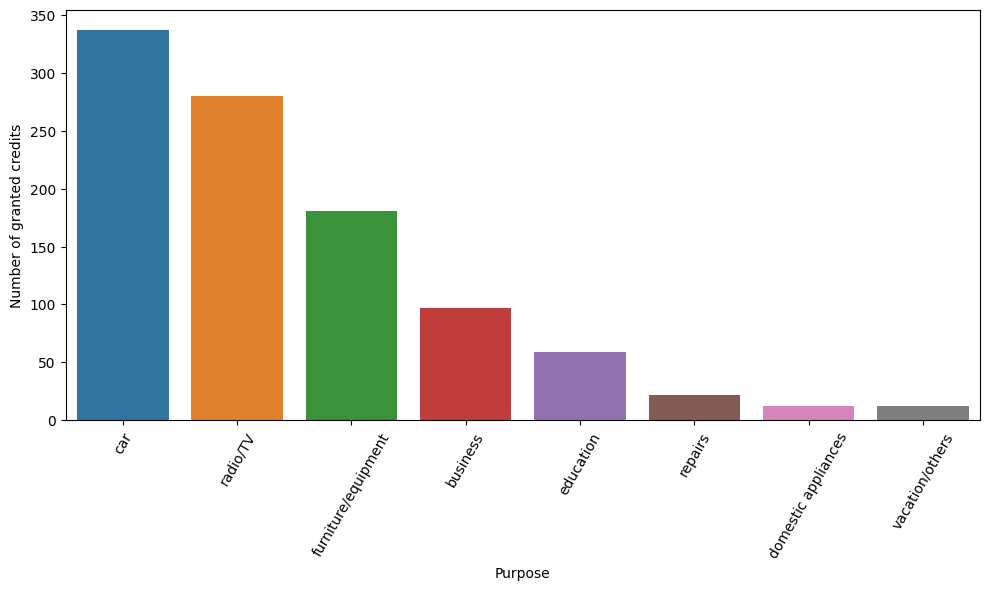

In [15]:
n_credits = df.groupby("Purpose")["Age"].count().rename("Count").reset_index()
n_credits.sort_values(by=["Count"], ascending=False, inplace=True)

plt.figure(figsize=(10,6))
bar = sns.barplot(x="Purpose",y="Count",data=n_credits)
bar.set_xticklabels(bar.get_xticklabels(), rotation=60)
plt.ylabel("Number of granted credits")
plt.tight_layout()

Kebanyakan credit yang diberikan itu bertujuan untuk membeli mobil, diikuti dengan entertainment serta furniture ruangan.

#Preprocessing

Data null pada 2 kolom di atas(saving accounts, checking accounts) merupakan sesuatu yang wajar karena tidak semua orang ingin membuka akun tabungan maka dari itu kita tidak akan menghilangkan baris null jika kolom tersebut memiliki nilai null.

Disini kita hanya menggunakan kolom Age, Credit Amount dan Duration untuk menentukan clustering pelanggan.

In [16]:
x = df.loc[:, ["Age", "Credit amount", "Duration"]]
x

,Age,Credit amount,Duration
0,67,1169,6
1,22,5951,48
2,49,2096,12
3,45,7882,42
4,53,4870,24
...,...,...,...
995,31,1736,12
996,40,3857,30
997,38,804,12
998,23,1845,45


Mari kita lihat data-data tersebut dalam sebuah grafik.

<ipython-input-17-cf0334540b62>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])


<Axes: xlabel='Age', ylabel='Density'>

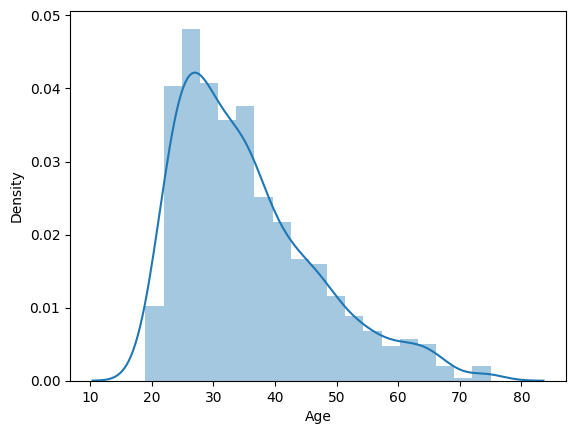

In [17]:
sns.distplot(df["Age"])

<ipython-input-18-2559c0ab0a6b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Credit amount"])


<Axes: xlabel='Credit amount', ylabel='Density'>

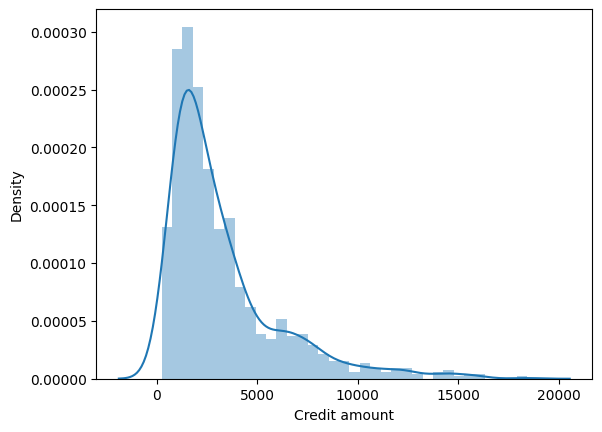

In [18]:
sns.distplot(df["Credit amount"])

<ipython-input-19-d8b417ce2cae>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Duration"])


<Axes: xlabel='Duration', ylabel='Density'>

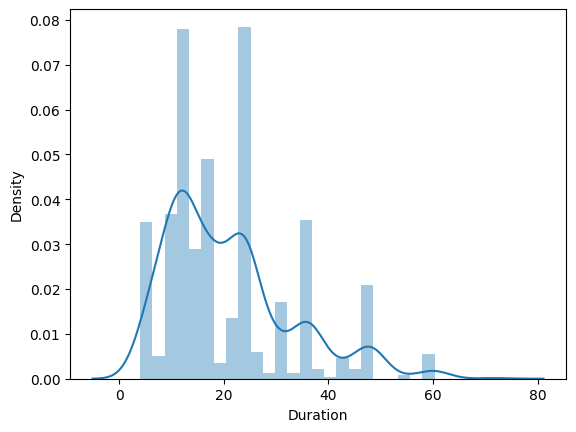

In [19]:
sns.distplot(df["Duration"])

Hasil dari grafik diatas menujukan sebuah skewness ke kiri, yang artinya data tersebut cenderung lebih besar di bagian kiri, mari kita perbaiki.

In [20]:
cluster_log = np.log(x)

<ipython-input-21-d6234a0227b7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cluster_log["Age"])


<Axes: xlabel='Age', ylabel='Density'>

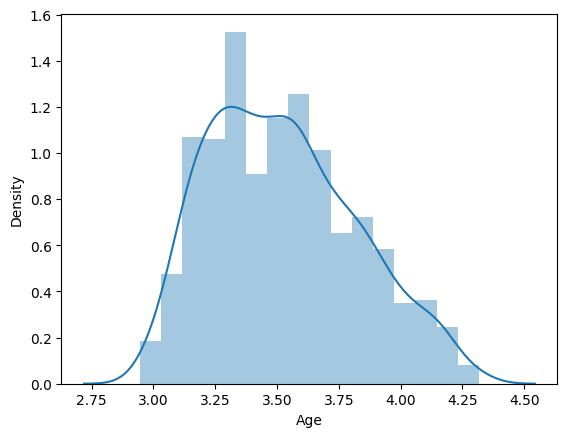

In [21]:
sns.distplot(cluster_log["Age"])

<ipython-input-22-7871d989eec9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cluster_log["Credit amount"])


<Axes: xlabel='Credit amount', ylabel='Density'>

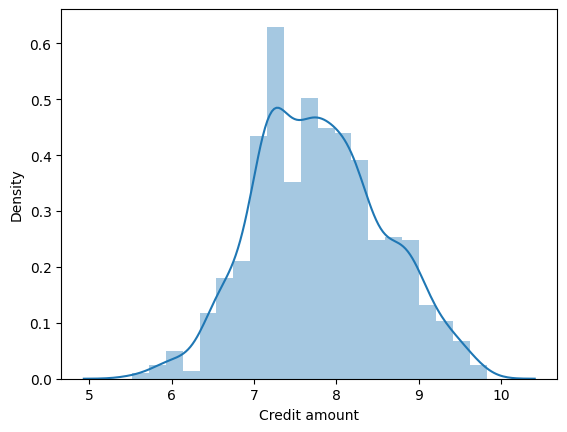

In [22]:
sns.distplot(cluster_log["Credit amount"])

<ipython-input-23-b43343b7d3e8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cluster_log["Duration"])


<Axes: xlabel='Duration', ylabel='Density'>

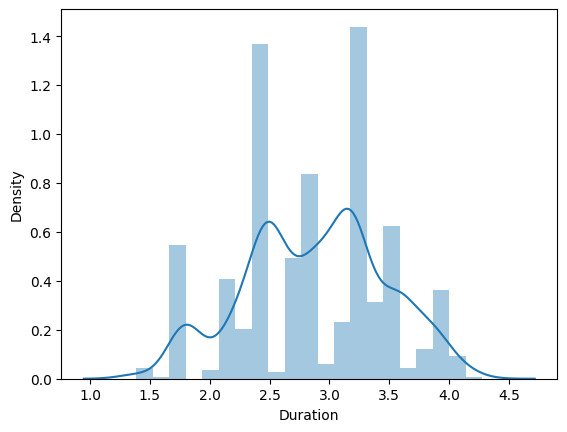

In [23]:
sns.distplot(cluster_log["Duration"])

Sudah tidak terlihat condong ke kirikan? bagus bagus, mari lanjut, kita akan melakukan scaling variable kita dengan menggunakan StandardScaler.

In [24]:
scaler = StandardScaler()
cluster_S = scaler.fit_transform(cluster_log)

Ditahap selanjutnya kita akan mencari nilai K yang paling optimal untuk digunakan dengan cara looping semua hasilnya dari K 1 hingga K 11 dan melihat pada plot yang dihasilkan. Dimana ada kemiringan yang paling signifikan maka disekitar itulah nilai K kita.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

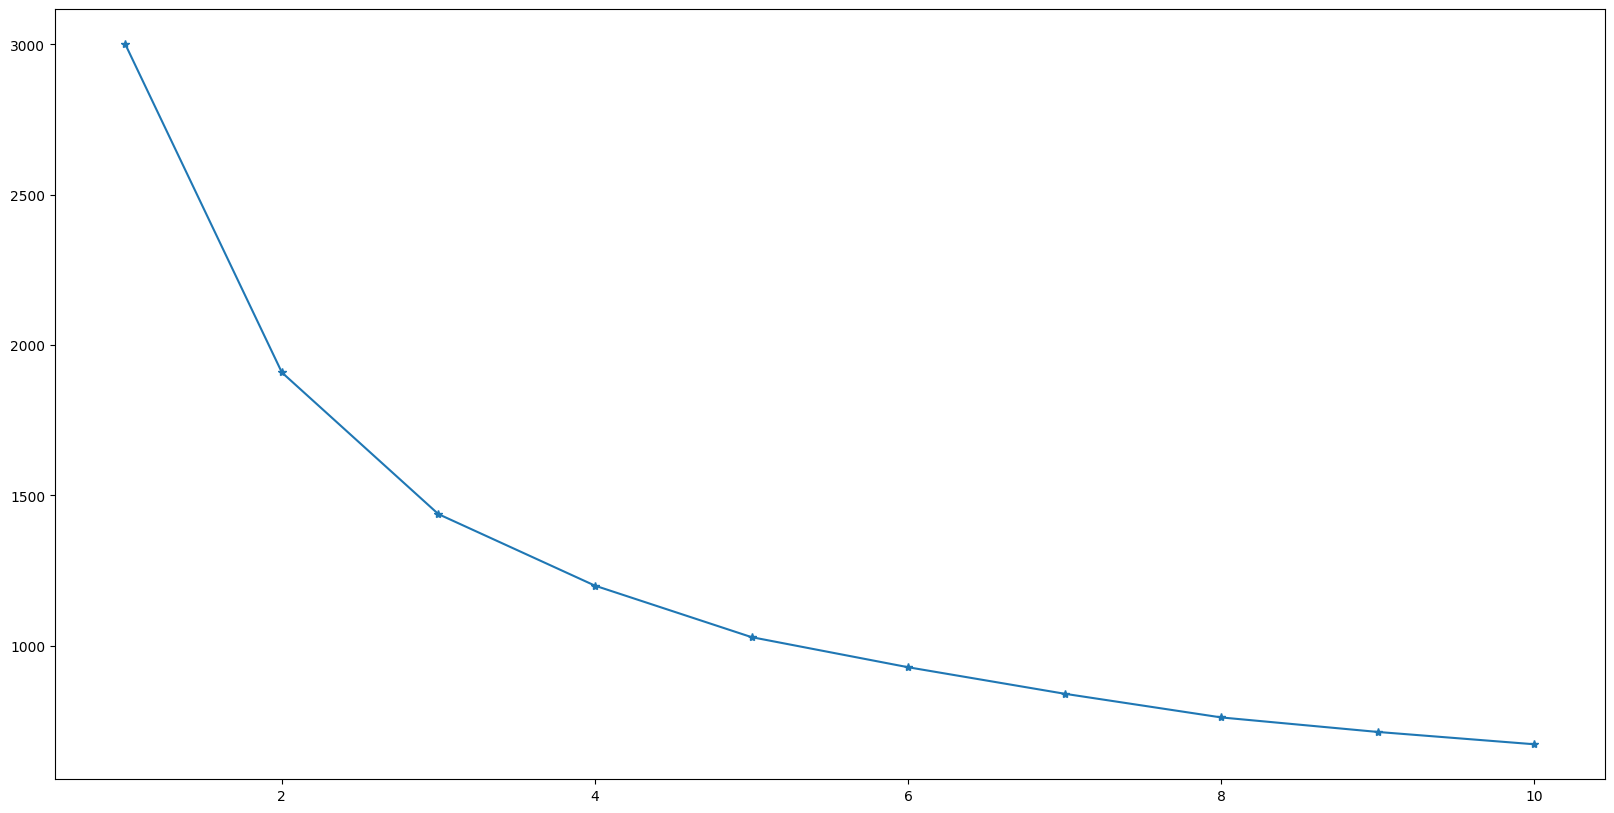

In [25]:
k = []
for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(cluster_S)
    k.append(kmeans.inertia_)

plt.figure(figsize=(20,10))
plt.plot(range(1,11), k, marker='*')
plt.show()

Elbownya sangat terlihat diantara angka 2 dan 3, disini kita akan menggunakan angka 3 sebagai nilai k.

#Modeling

Huft, bagian sulitnya sudah dilewati, mari kita mulai modeling yang seharusnya cukup mudah dilakukan

In [26]:
kmeans = KMeans(n_clusters=3).fit(cluster_S)
print(kmeans.cluster_centers_)
labels = pd.DataFrame(kmeans.labels_)
res = x.assign(Cluster = labels)

[[-0.09479942  0.93238099  0.92306198]
 [ 1.14348979 -0.5148609  -0.60141738]
 [-0.71206031 -0.59096693 -0.52016705]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering sudah selesai dan label-nya sudah di masukkan pada variable 'x'.

<Axes: xlabel='Credit amount', ylabel='Duration'>

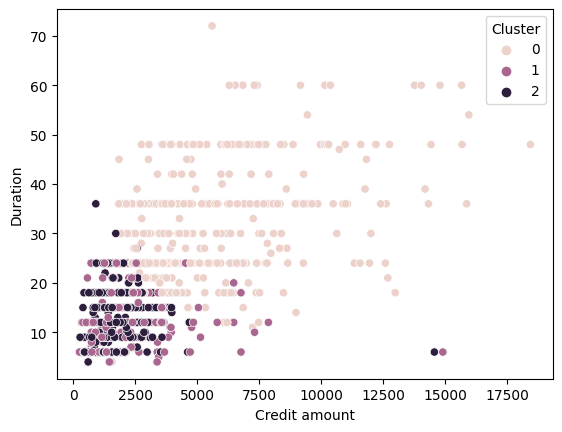

In [27]:
sns.scatterplot(x="Credit amount",y="Duration", hue="Cluster", data = res)

<Axes: xlabel='Duration', ylabel='Age'>

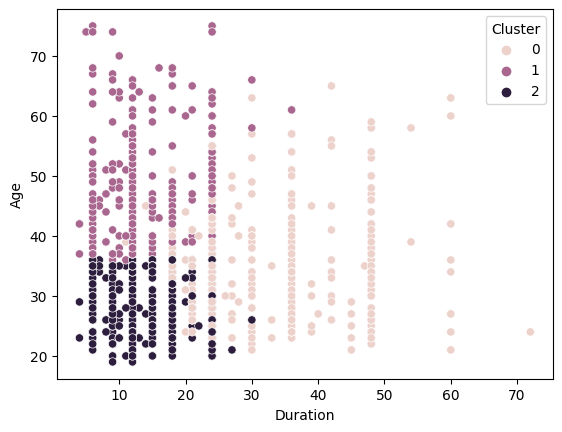

In [28]:
sns.scatterplot(x="Duration",y="Age", hue="Cluster", data = res)

<Axes: xlabel='Credit amount', ylabel='Age'>

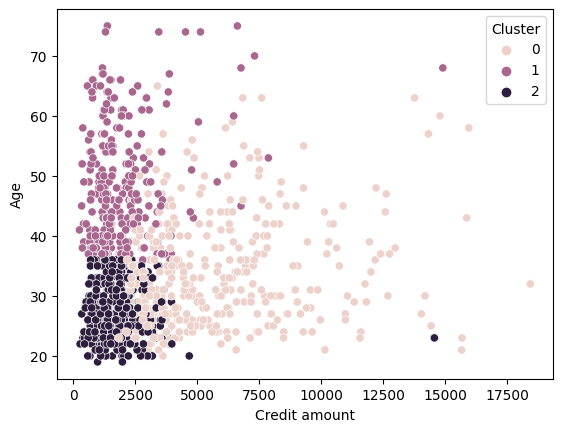

In [29]:
sns.scatterplot(x="Credit amount",y="Age", hue="Cluster", data = res)

Data-datanya sudah kita cluster/kelompokkan, namun kita masih belum mengetahui titik tengah dari masing masing cluster, mari cari nilainya!

In [30]:
km_th = res.groupby(['Cluster']).mean().round(1)
#Kita gunakan round(1) agar angka decimalnya tidak terlalu panjang saat kita mencari nilai meannya
km_th

,Age,Credit amount,Duration
Cluster,,,
0,34.0,5665.4,32.2
1,48.7,1979.7,13.9
2,27.8,1732.2,14.2


Selesai!, diatas merupakan titik tengahnya.

#Exporting dengan Pickle

In [31]:
import pickle

with open("model.pkl", "wb") as mod:
    pickle.dump(kmeans, mod)

Yeay selesai!